In [2]:
from PIL import Image
import os,sys
import matplotlib.pyplot as plt
import numpy as np
import skimage
from pathlib import Path
from skimage.io import imread
from sklearn.utils import Bunch
from sklearn import svm,metrics,datasets
from sklearn.model_selection import GridSearchCV,train_test_split
import pickle

In [2]:
from pathlib import Path
from skimage.io import imread
import numpy as np
from sklearn.utils import Bunch

def load_image_dataset(path):
    image_dir = Path(path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [folder.name for folder in folders]

    images = []
    flat_data = []
    target = []

    for i, folder in enumerate(folders):
        for file in folder.iterdir():
            if file.suffix.lower() in ['.jpg', '.jpeg', '.png']:  # only image files
                try:
                    img = imread(file)
                    flat_data.append(img.flatten())
                    images.append(img)
                    target.append(i)
                except Exception as e:
                    print(f"Skipping {file.name}: {e}")

    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data, target=target, target_names=categories, images=images)



In [3]:
dataset = load_image_dataset(r"C:\Users\sariy\OneDrive\Desktop\skindisease\hog_dataset")

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.1
)



In [4]:
print(f"Total samples: {len(dataset.data)}")
print(f"Train samples: {len(x_train)}, Test samples: {len(x_test)}")
print(f"Categories: {dataset.target_names}")


Total samples: 170
Train samples: 153, Test samples: 17
Categories: ['basal cell carcinoma', 'melanoma', 'naevus']


In [5]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (153, 24576)
x_test shape: (17, 24576)
y_train shape: (153,)
y_test shape: (17,)


In [9]:
from sklearn import svm
import pickle

model = svm.SVC()
model.fit(x_train, y_train)
pickle.dump(model, open('./svm.pkl', 'wb'))

# Make prediction
pred = model.predict(x_test)


Accuracy: 0.47

Classification Report:
                      precision    recall  f1-score   support

basal cell carcinoma       0.00      0.00      0.00         3
            melanoma       0.00      0.00      0.00         6
              naevus       0.47      1.00      0.64         8

            accuracy                           0.47        17
           macro avg       0.16      0.33      0.21        17
        weighted avg       0.22      0.47      0.30        17



C:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

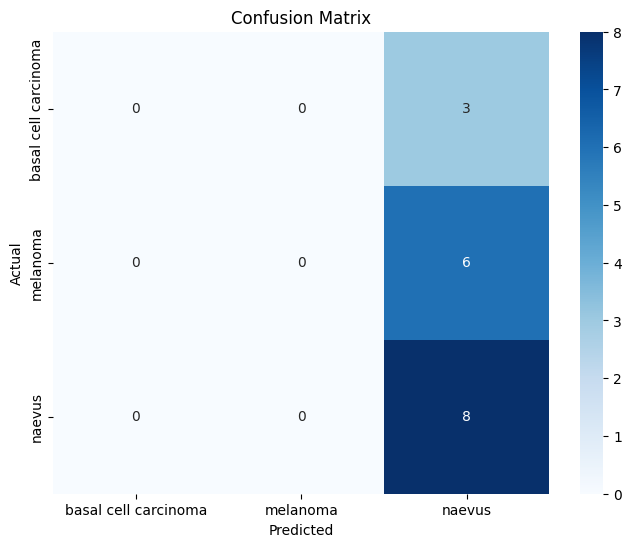

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the predictions
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, pred, target_names=dataset.target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=dataset.target_names, yticklabels=dataset.target_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

0.47058823529411764


In [12]:
from sklearn.naive_bayes import GaussianNB 

In [13]:
gnb = GaussianNB().fit(x_train, y_train) 
pickle.dump(gnb,open('./naive_bayes.pkl','wb'))
gnb_predictions = gnb.predict(x_test) 

In [14]:
print(accuracy_score(gnb_predictions,y_test))

0.4117647058823529


In [15]:
print(gnb_predictions)

[2 2 2 1 2 0 2 2 1 2 0 2 1 2 2 2 2]


In [16]:
print(y_test)

[0 2 2 0 2 1 1 1 2 1 2 2 1 2 0 1 2]


In [17]:
!python -m pip install --upgrade pip


In [12]:
!py -m pip install matplotlib


In [2]:
!pip list


Package         Version
--------------- -----------
contourpy       1.3.1
cycler          0.12.1
fonttools       4.57.0
imageio         2.37.0
joblib          1.4.2
kiwisolver      1.4.8
lazy_loader     0.4
matplotlib      3.10.1
networkx        3.4.2
numpy           2.2.4
opencv-python   4.11.0.86
packaging       24.2
pandas          2.2.3
pillow          11.1.0
pip             25.0.1
pyparsing       3.2.3
python-dateutil 2.9.0.post0
pytz            2025.2
scikit-image    0.25.2
scikit-learn    1.6.1
scipy           1.15.2
seaborn         0.13.2
six             1.17.0
threadpoolctl   3.6.0
tifffile        2025.3.30
tzdata          2025.2


In [3]:
import sys
print(sys.executable)


C:\Users\sariy\AppData\Local\Programs\Python\Python312\python.exe


In [2]:
!pip uninstall matplotlib -y

Found existing installation: matplotlib 3.10.1
Uninstalling matplotlib-3.10.1:
  Successfully uninstalled matplotlib-3.10.1


In [3]:
!pip install matplotlib

  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)


In [4]:
!pip show matplotlib


Name: matplotlib
Version: 3.10.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

 1. This LICENSE AGREEMENT is between the Matplotlib Development Team
 ("MDT"), and the Individual or Organization ("Licensee") accessing and
 otherwise using matplotlib software in source or binary form and its
 associated documentation.

 2. Subject to the terms and conditions of this License Agreement, MDT
 hereby grants Licensee a nonexclusive, royalty-free, world-wide license
 to reproduce, analyze, test, perform and/or display publicly, prepare
 derivative works, distribute, and otherwise use matplotlib
 alone or in any derivative version, provided, however, that MDT's
 License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
 2012- Matplotlib Development Team; All Rights Reserved" are retained in
 matplotlib

In [2]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot")
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [3]:
!pip show matplotlib


In [4]:
import sys
print(sys.executable)


C:\Users\sariy\AppData\Local\Programs\Python\Python312\python.exe


In [1]:
!pip install scikit-image


In [7]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
